In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = sns.load_dataset("mpg").dropna()
data.shape

(392, 9)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Univariate(1D) KDE plot

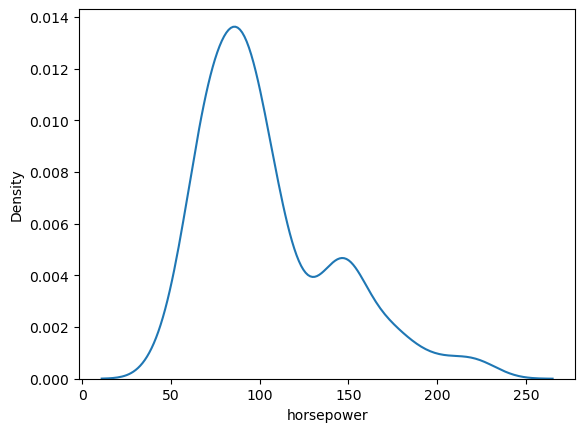

In [4]:
sns.kdeplot(data.horsepower)
plt.show()

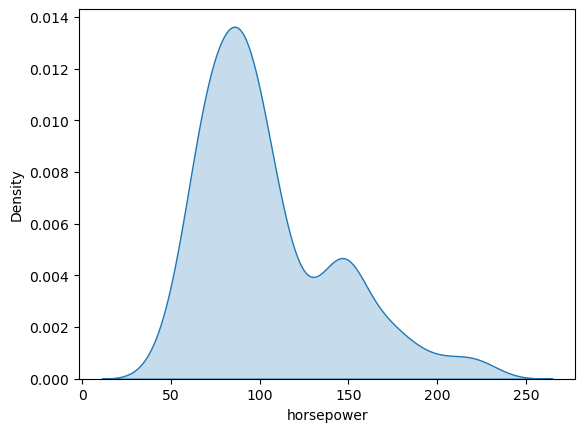

In [5]:
sns.kdeplot(data.horsepower, shade=True)
plt.show()

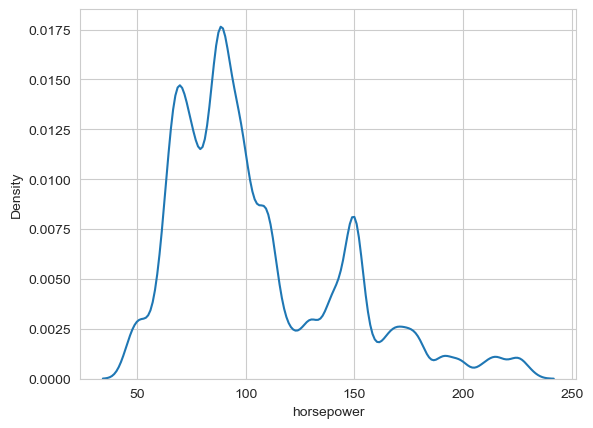

In [6]:
sns.set_style("whitegrid")
sns.kdeplot(data.horsepower, bw=0.1);

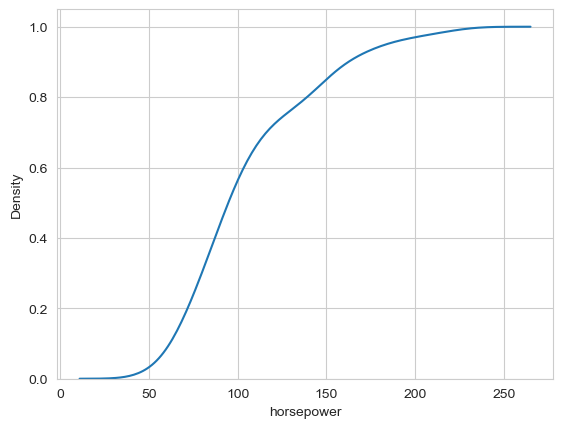

In [7]:
sns.kdeplot(data.horsepower, cumulative=True);

# Bi-variate(2D) KDE plot

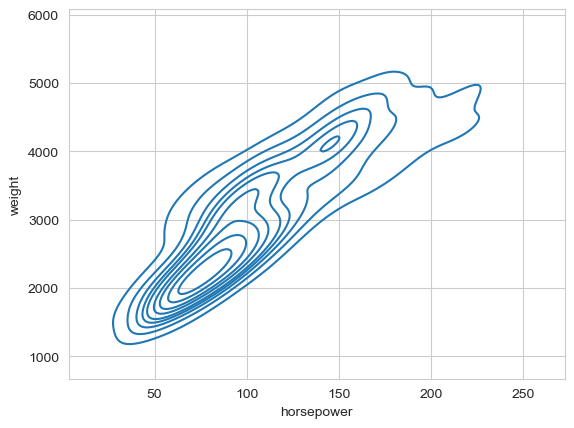

In [8]:
sns.kdeplot(data.horsepower, data.weight);

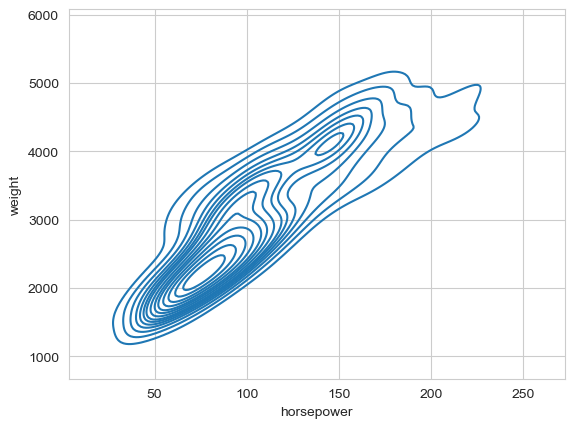

In [9]:
sns.kdeplot(data.horsepower, data.weight, n_levels=15);

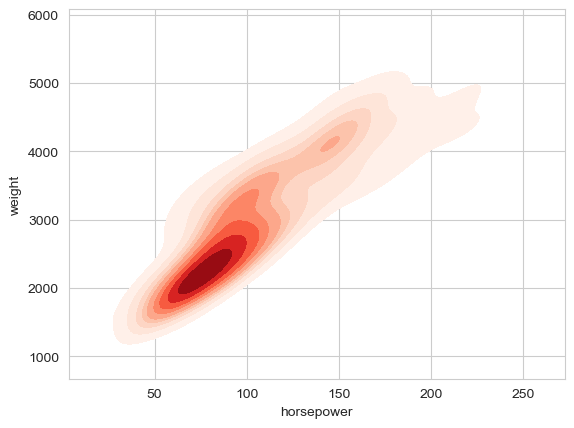

In [10]:
sns.kdeplot(data.horsepower, data.weight, cmap="Reds", shade=True, shade_lowest=False);

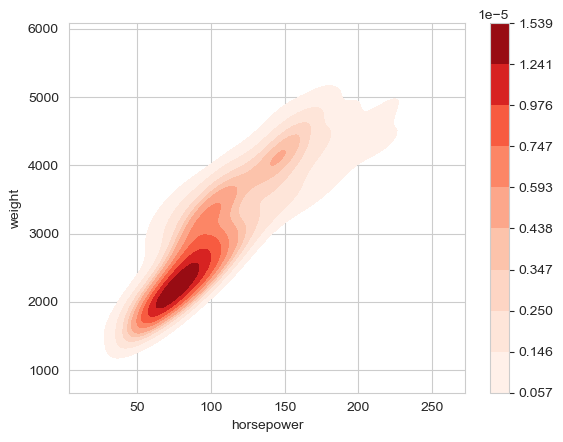

In [11]:
sns.kdeplot(data.horsepower, data.weight, cmap="Reds", shade=True, shade_lowest=False, cbar=True);

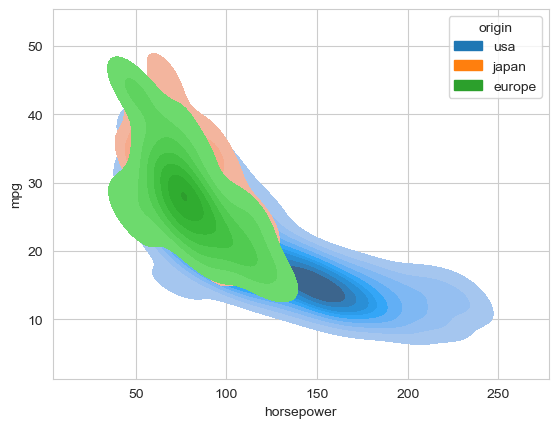

In [12]:
sns.kdeplot(data.horsepower, data.mpg, 
            shade=True, hue=data.origin);

# Univariate(1D) histogram

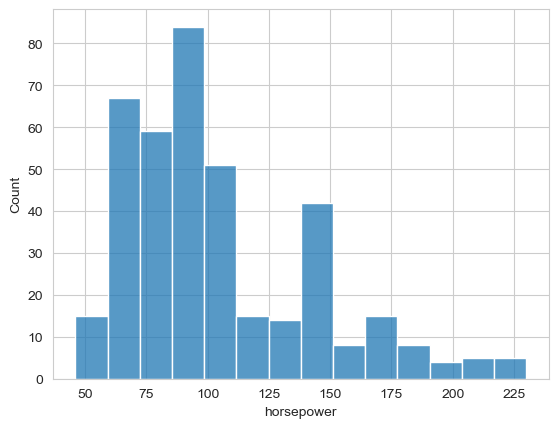

In [13]:
sns.histplot(data.horsepower); # or sns.histplot(x = 'horsepower', data = data);

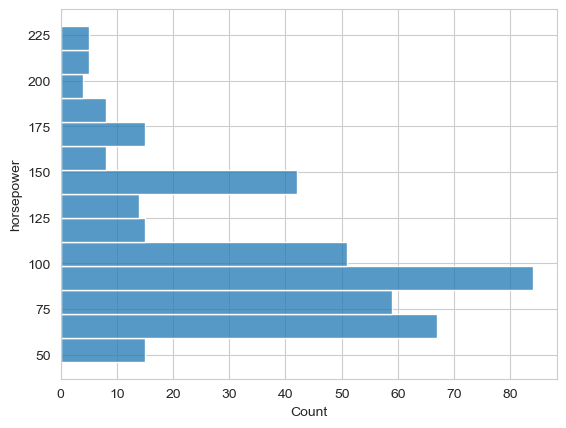

In [14]:
sns.histplot(y = 'horsepower', data = data);

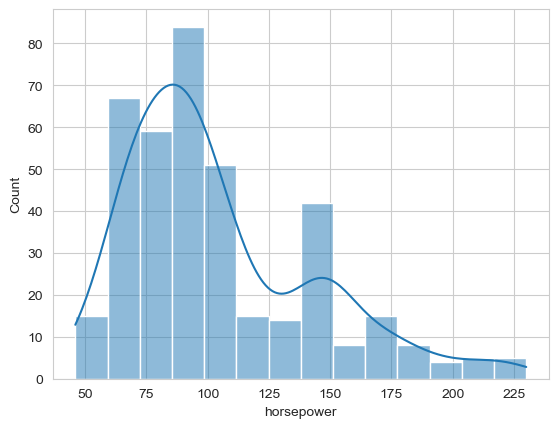

In [15]:
sns.histplot(data.horsepower, kde=True);

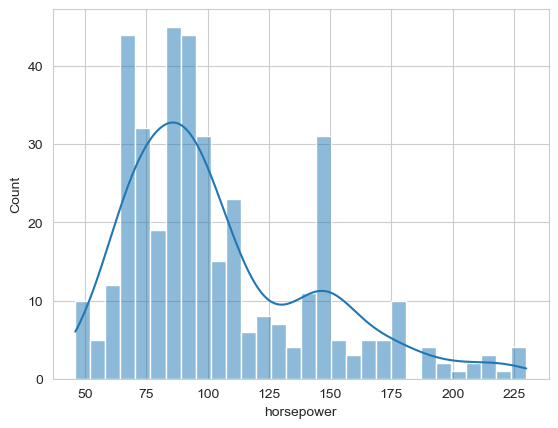

In [16]:
sns.histplot(data.horsepower, bins = 30, kde=True);

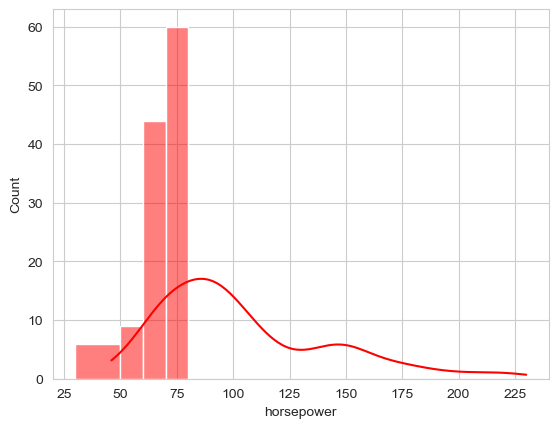

In [17]:
sns.histplot(data.horsepower, bins = [30, 50, 60, 70, 80], kde=True, color = 'red');

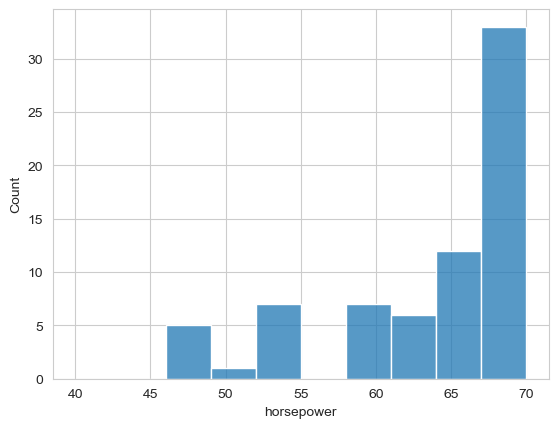

In [18]:
sns.histplot(data.horsepower, binwidth=3, binrange=(40, 70));

## Statistics of the data

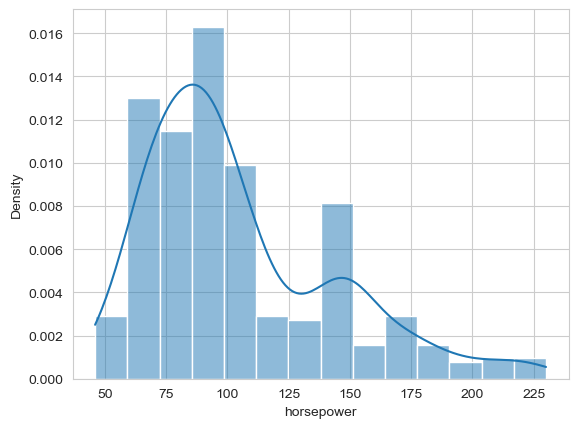

In [19]:
sns.histplot(data.horsepower, stat="density", kde=True); #area under the curve equals 1 or 100%

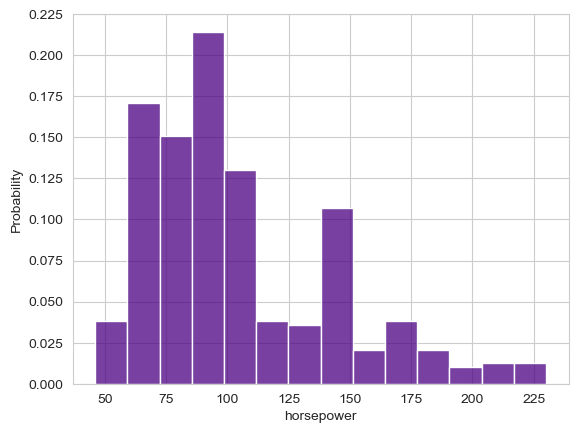

In [20]:
sns.histplot(data.horsepower, stat="probability", color="indigo");

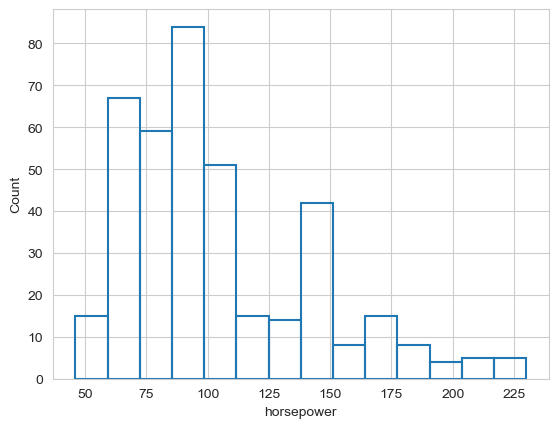

In [21]:
sns.histplot(data.horsepower, stat="count", fill=False);

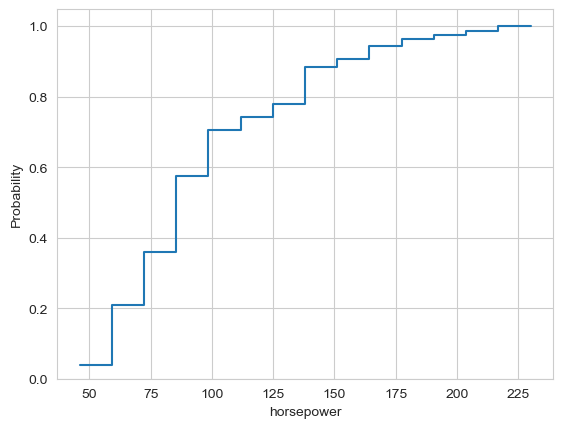

In [22]:
sns.histplot(data.horsepower, stat="probability", cumulative=True, fill=False, element="step");


## Categorical variables

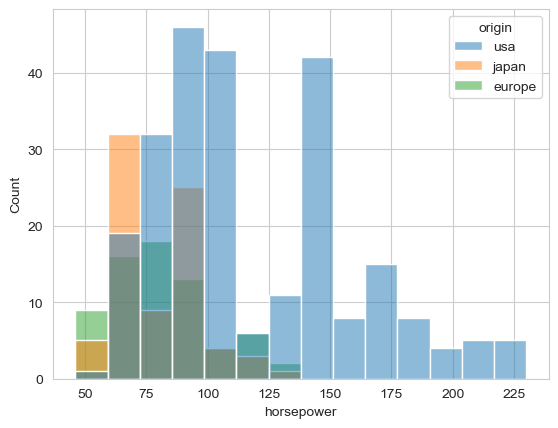

In [23]:
sns.histplot(x="horsepower", hue="origin", data = data, element="bars"); # default

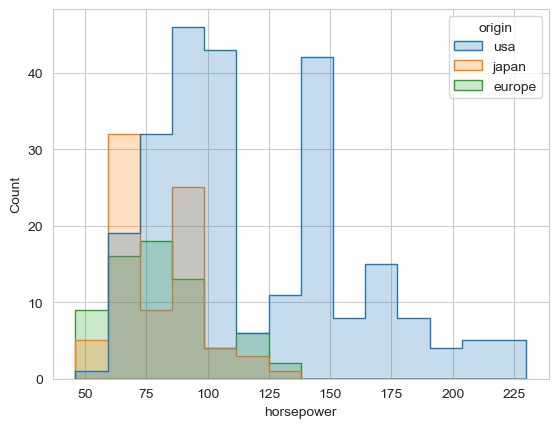

In [24]:
sns.histplot(x="horsepower", hue="origin", data = data, element="step");

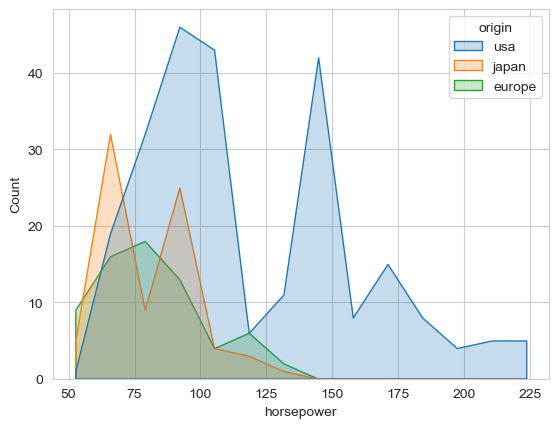

In [25]:
sns.histplot(x="horsepower", hue="origin", data = data, element="poly");

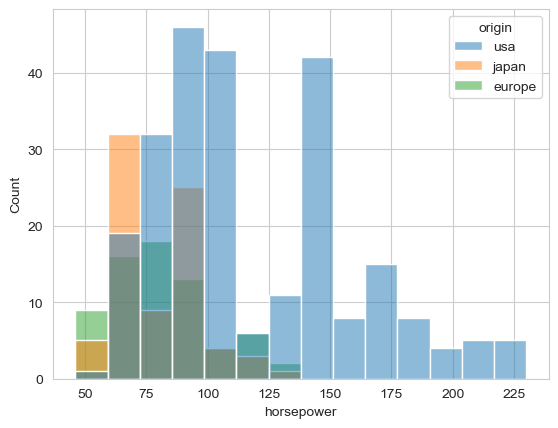

In [26]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="layer"); # default

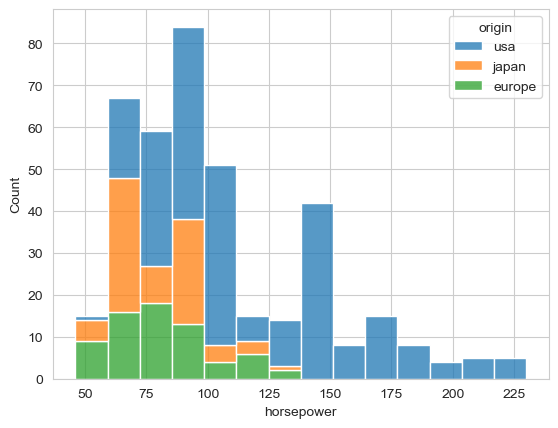

In [27]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="stack");

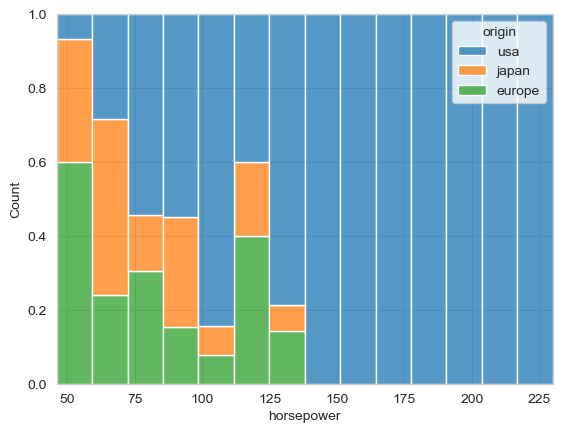

In [28]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="fill");

# Bi-variate(2D) histogram

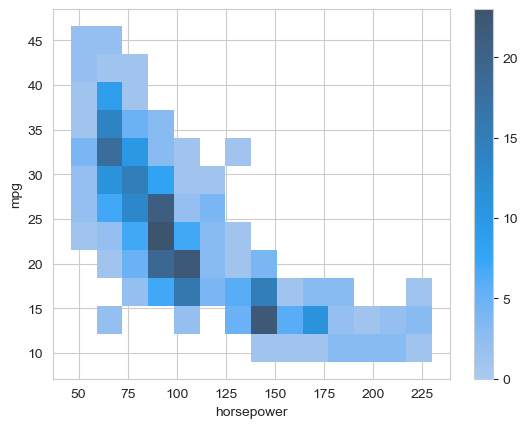

In [29]:
sns.histplot(x="horsepower", y="mpg", data = data, cbar=True);

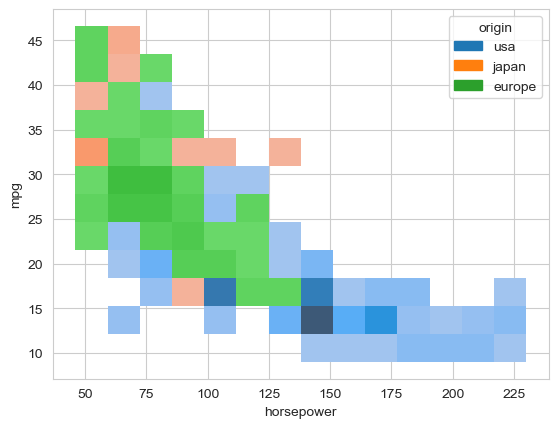

In [30]:
sns.histplot(x="horsepower", y="mpg", data = data, hue="origin");

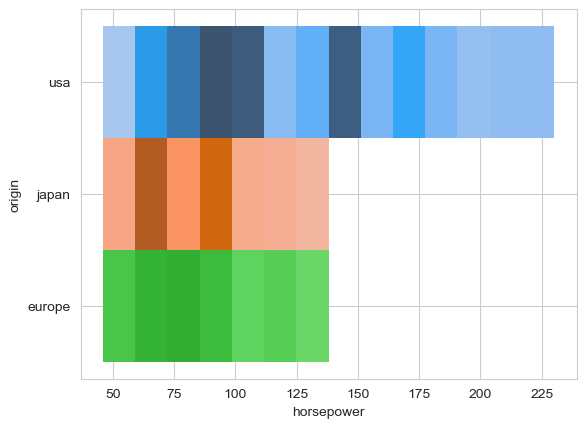

In [31]:
sns.histplot(x="horsepower", y="origin", data = data, hue="origin", legend=False);
# now it looks nice and clean

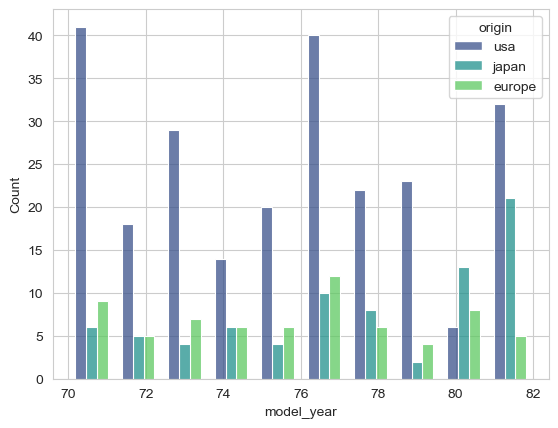

In [32]:
sns.histplot(x='model_year', hue='origin', data = data, multiple="dodge", shrink=0.7, palette="viridis");
# now we have space between the bars in each group

# Box plot

In [33]:
data.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

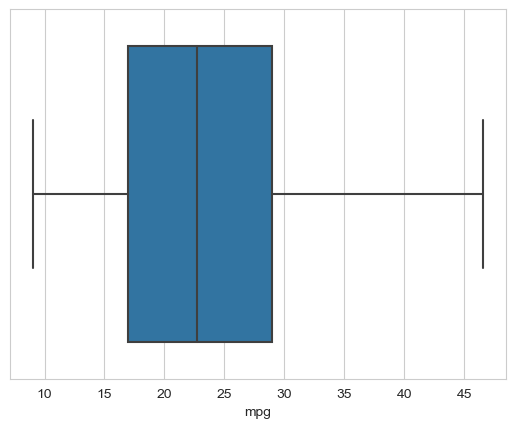

In [34]:
sns.boxplot(data.mpg);

In [35]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

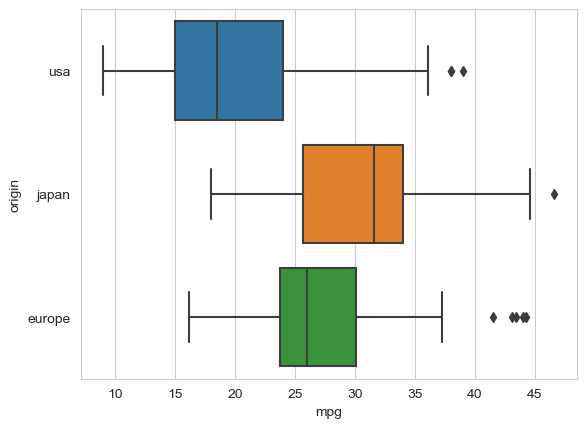

In [36]:
sns.boxplot(x=data.mpg, y=data.origin);

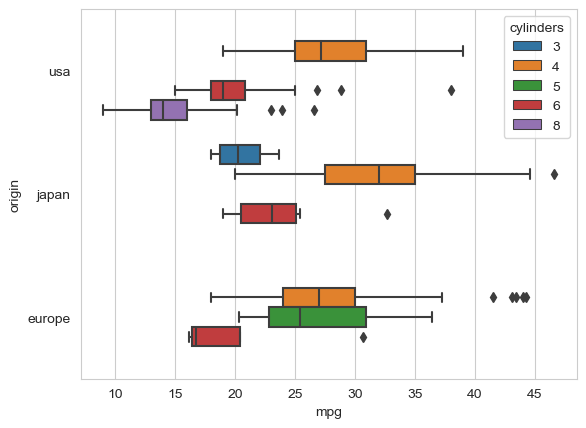

In [37]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.cylinders);

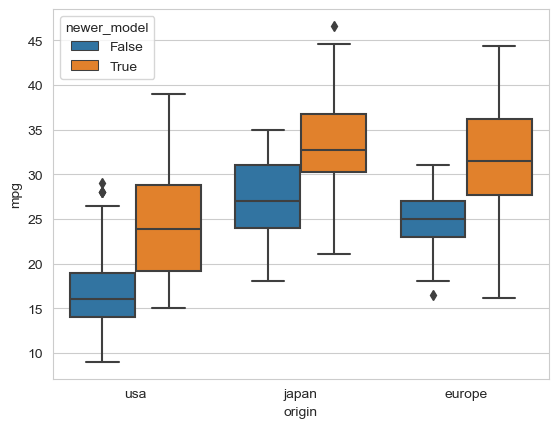

In [38]:
data['newer_model'] = data.model_year > 76
sns.boxplot(y=data.mpg, x=data.origin, hue=data.newer_model);

## Styling boxplot

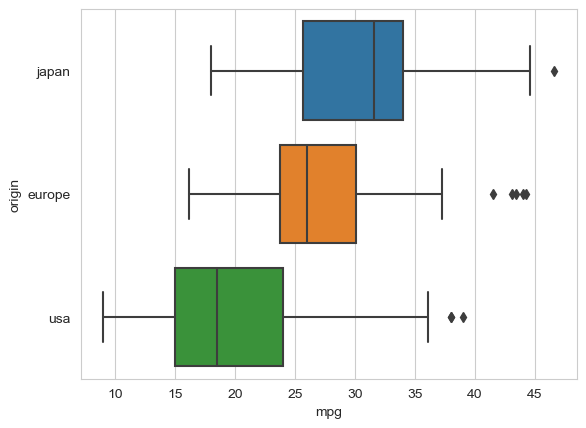

In [39]:
sns.boxplot(x=data.mpg, y=data.origin, order=["japan", "europe", "usa"]);

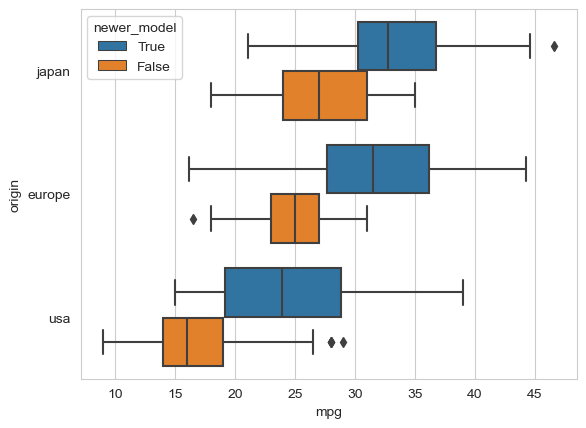

In [40]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, order=["japan", "europe", "usa"], hue_order=[True, False]);

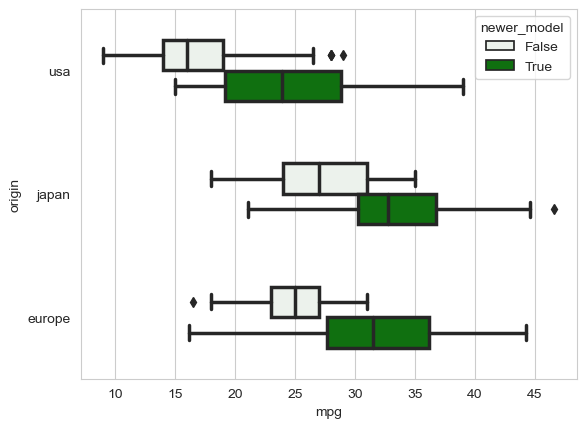

In [41]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, color="green", width=0.5, linewidth=2.5);

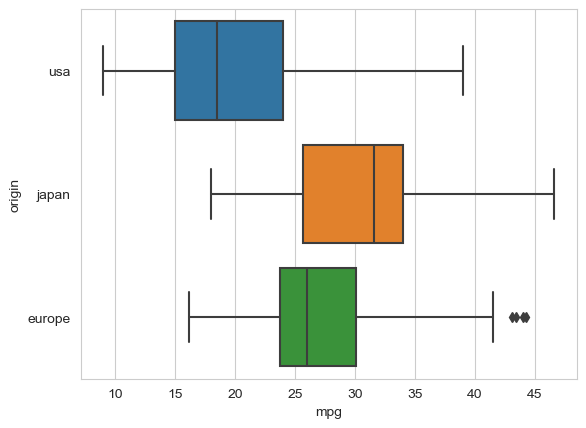

In [42]:
sns.boxplot(x=data.mpg, y=data.origin, whis=2); # the term whis is the length of the whiskers and it is 1.5 by default

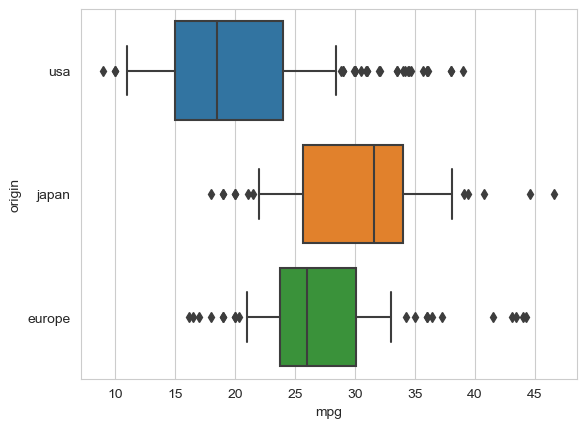

In [43]:
sns.boxplot(x=data.mpg, y=data.origin, whis=0.5);

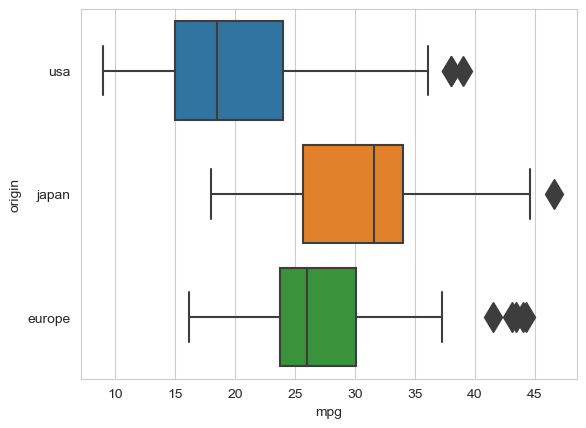

In [44]:
sns.boxplot(x=data.mpg, y=data.origin, fliersize=15); # the size of the outliers

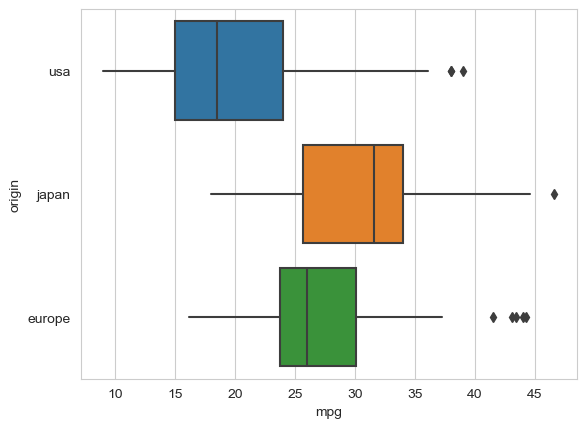

In [45]:
sns.boxplot(x=data.mpg, y=data.origin, showcaps=False); # no caps on the whiskers

# Scatter plot

In [46]:
diamond = sns.load_dataset("diamonds")
diamond.shape

(53940, 10)

In [47]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df = diamond.sample(n=100, random_state=20)
df.shape

(100, 10)

In [73]:
sns.set_style("dark")

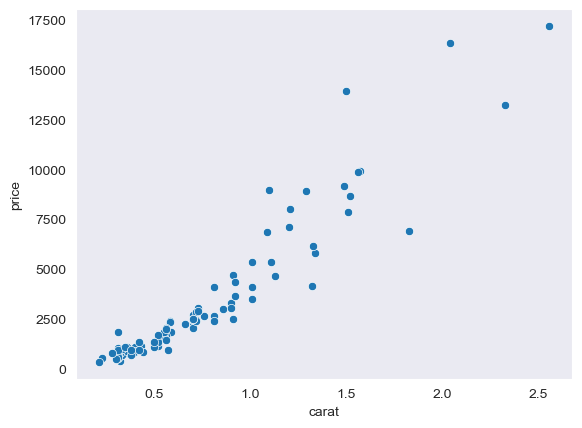

In [74]:
sns.scatterplot(x="carat", y="price", data=df);

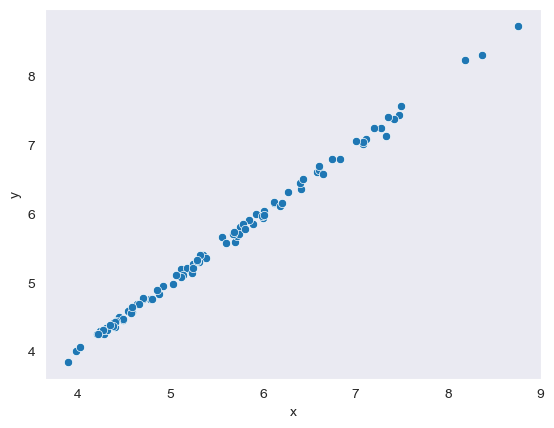

In [75]:
sns.scatterplot(x="x", y="y", data=df);

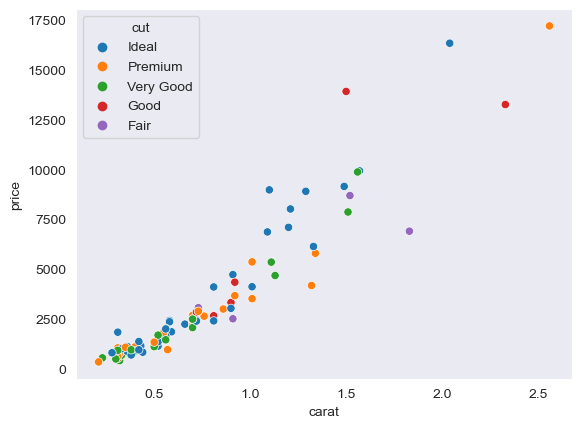

In [76]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut");

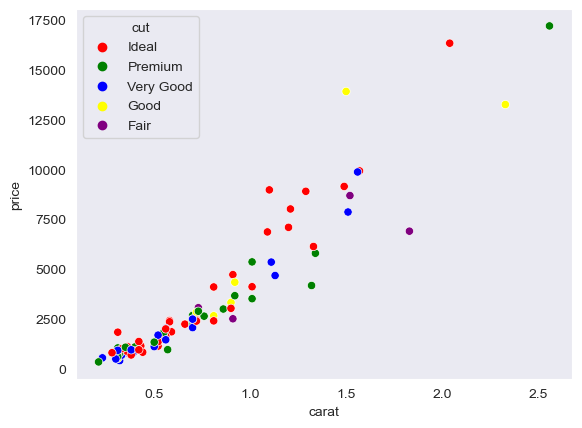

In [77]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette=["red", "green", "blue", "yellow", "purple"]);

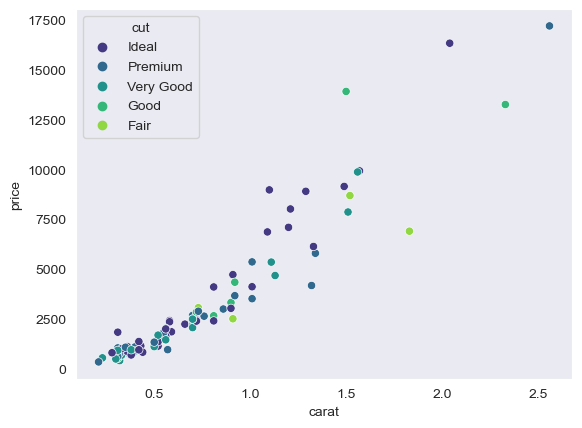

In [78]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette="viridis");

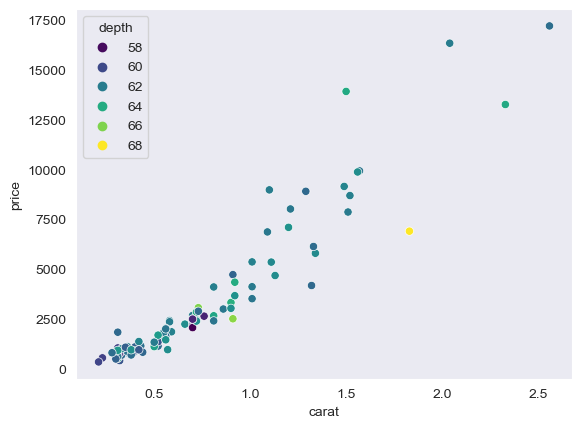

In [79]:
# hue for continuous variable
sns.scatterplot(x="carat", y="price", data=df, hue="depth", palette="viridis");

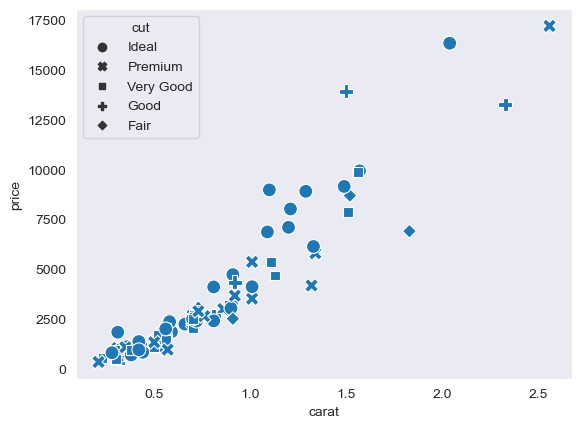

In [80]:
sns.scatterplot(x="carat", y="price", data=df, s=100, style='cut'); # size of the points

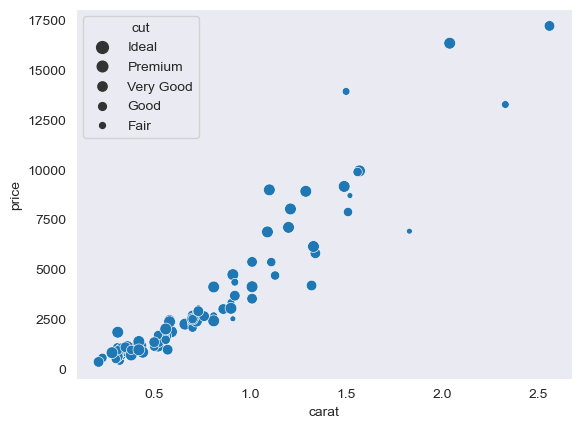

In [83]:
sns.scatterplot(x="carat", y="price", data=df, size='cut'); # we can add size of the classes by using sizes=[]

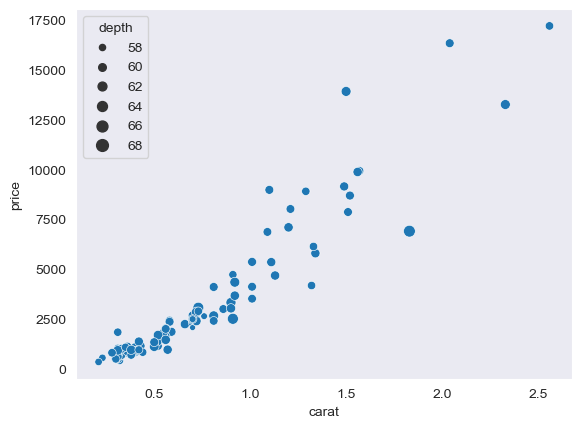

In [84]:
sns.scatterplot(x="carat", y="price", data=df, size='depth');

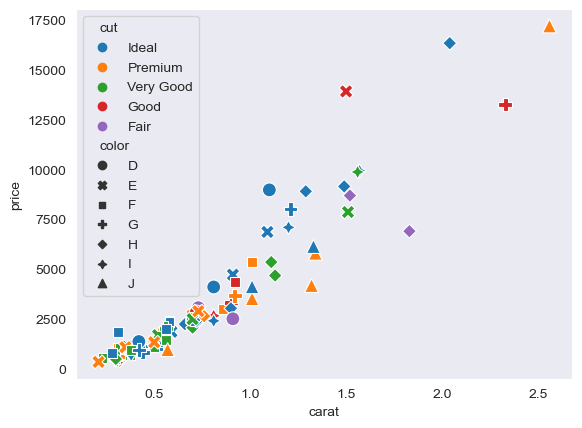

In [89]:
sns.scatterplot(x="carat", y="price", data=df, style='color', hue='cut', s=100);

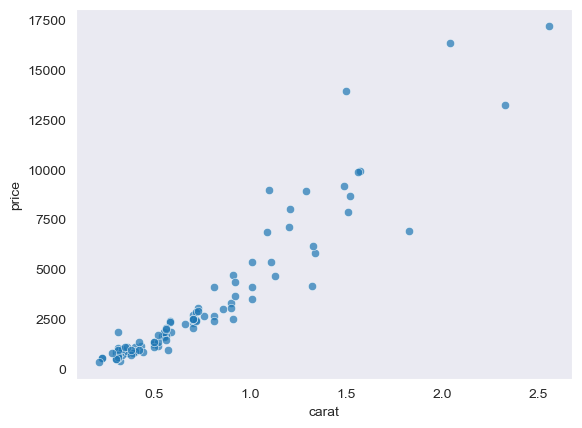

In [93]:
sns.scatterplot(x="carat", y="price", data=df, alpha=0.7);

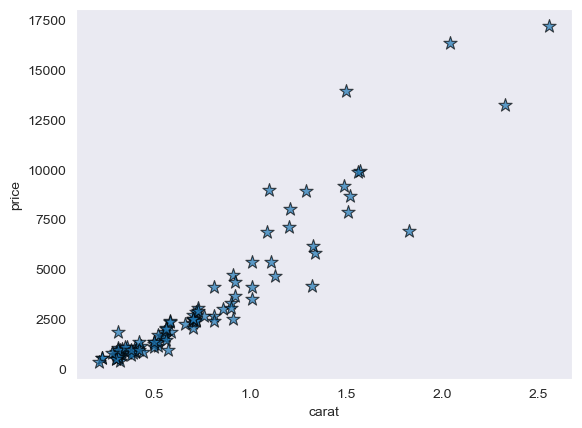

In [110]:
sns.scatterplot(x="carat", y="price", data=df, s = 100, alpha=0.7, marker='*', edgecolor='black');

# Line plot